In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [12]:
from tensorflow.examples.tutorials.mnist import input_data

In [13]:
mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [14]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [15]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

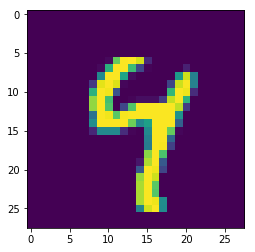

In [19]:
plt.imshow(mnist.train.images[2].reshape(28,28))

In [76]:
#Placeholders
x = tf.placeholder(tf.float32,shape=[None,784])
y_true = tf.placeholder(tf.float32, shape=[None,10])

In [77]:
#Variables
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [78]:
#Graph
y = tf.matmul(x,W) + b

In [79]:
#Loss Function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

In [80]:
#Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cross_entropy)

In [81]:
#Create Session
init = tf.global_variables_initializer()

In [84]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(10000):
        batch_x , batch_y = mnist.train.next_batch(100)
        sess.run(train, feed_dict={x:batch_x, y_true:batch_y})
        
    #Evaluate model
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))
    
    #[True,False,True, ...] --> [1,0,1]
    acc = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    print(sess.run(acc, feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9277
